In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set_theme()
sns.set(font_scale = 2)

In [9]:
data_df = pd.DataFrame(columns=["system_name", "run_id", "latency", "operation", "on_leader", "n_nodes", "n_clients", "order_on_write"])

for f in glob.glob("results/experiment1_*"):
    temp_df = pd.read_csv(f)
    data_df = data_df.append(temp_df, ignore_index=True)


# data_df["Ordering"] = "On write" if  data_df["order_on_write"] == 1 else "On read"

data_df.to_csv("results/experiment1.csv")



In [10]:
display(data_df.head())

,system_name,run_id,latency,operation,on_leader,n_nodes,n_clients,order_on_write
0,DAS,0,0.003857,write,True,4,1,False
1,DAS,0,0.002988,write,False,4,1,False
2,DAS,0,0.001971,write,False,4,1,False
3,DAS,0,0.000721,read,False,4,1,False
4,DAS,0,0.002856,write,False,4,1,False


In [11]:
agg_df = data_df.groupby(['operation', 'run_id', 'n_nodes', 'order_on_write']).latency.mean().reset_index()
agg_df["latency_factor"] = agg_df["latency"] / agg_df["n_nodes"]

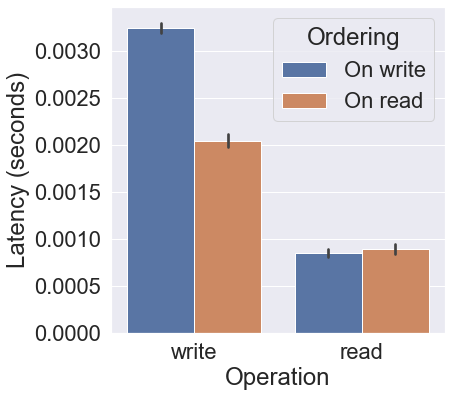

In [12]:
plt.figure(figsize=(6, 6))
ax = sns.barplot(x="operation", y="latency", hue="order_on_write", hue_order=[True, False], data=data_df)
ax.set(xlabel='Operation', ylabel='Latency (seconds)')

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles, ['On write', 'On read'], title='Ordering')

<Figure size 432x432 with 0 Axes>

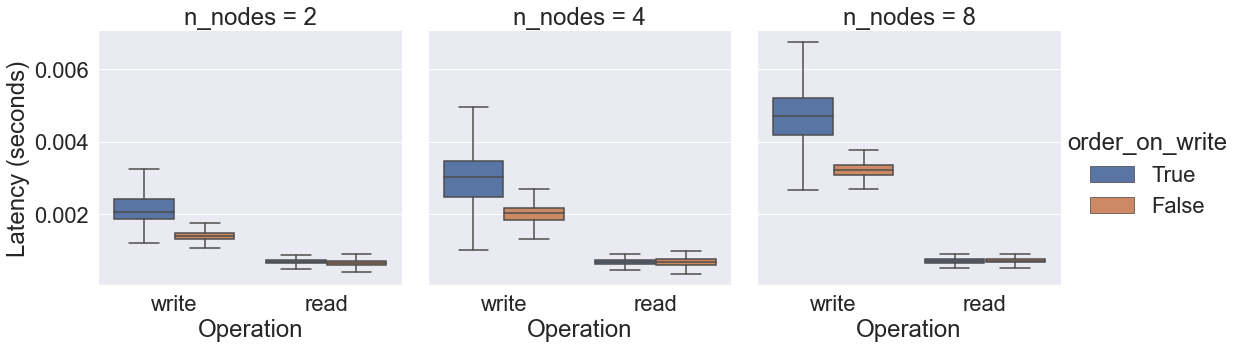

In [7]:
plt.figure(figsize=(6, 6))
ax = sns.catplot(kind="box", x="operation", y="latency", hue="order_on_write", hue_order=[True, False], col="n_nodes", data=data_df[data_df["latency"] < 3], showfliers=False)
ax.set_ylabels("Latency (seconds)")
ax.set_xlabels("Operation")

<Figure size 576x576 with 0 Axes>

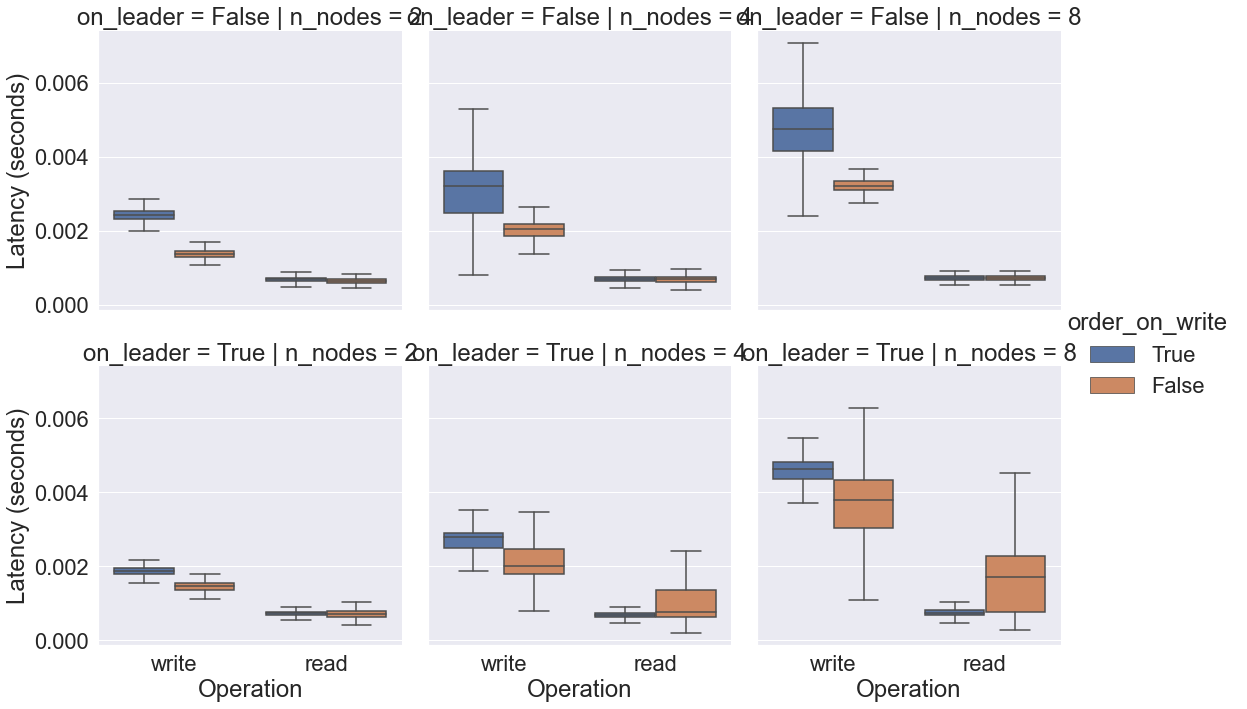

In [13]:
plt.figure(figsize=(8, 8))
ax = sns.catplot(kind="box", x="operation", y="latency", hue="order_on_write", hue_order=[True, False], col="n_nodes", row="on_leader", data=data_df, showfliers=False)
ax.set_ylabels("Latency (seconds)")
ax.set_xlabels("Operation")

# leg_handles = ax.get_legend_handles_labels()[0]
# ax.legend(leg_handles, ['On write', 'On read'], title='Ordering')

read


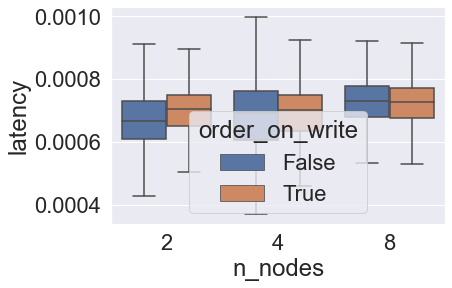

write


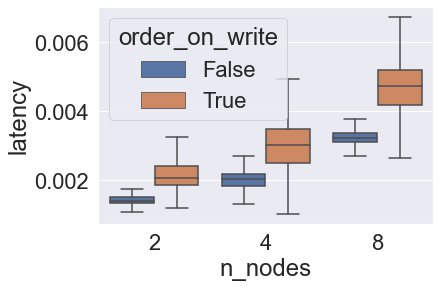

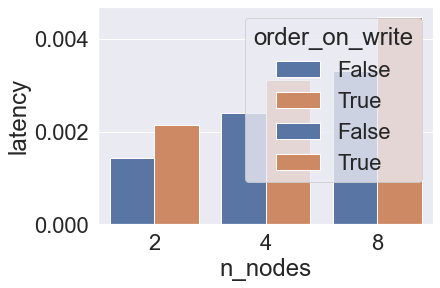

In [14]:
# ax = None
# for group, group_df in agg_df.groupby(['system_name', 'operation']):
#     label = f"order_on_write={group[0]}, operation={group[1]}"
#     ax = group_df.plot(x='n_nodes', y='speedup', figsize=(24, 6), ax=ax, label=label)

# fig, axs = plt.subplots(2, 1, figsize=(20, 12))




for group, group_df in data_df.groupby(['operation']):
    print(group)
    sns.boxplot(x='n_nodes', y='latency', hue="order_on_write", data=group_df, showfliers=False)
    plt.show()

idx = 0
ax= None
for group, group_df in agg_df.groupby(['operation']):
    # display(group_df)
    # axs[idx].set_title(group_df.iloc[0, 1])
    ax = sns.barplot(ax=ax, x='n_nodes', y='latency', hue="order_on_write", data=group_df)
    idx += 1


In [15]:
q_df = data_df[data_df["latency"] < 3].groupby(['operation', 'n_nodes', 'order_on_write', 'on_leader']).latency.quantile([.8, .9, .91, .92, .93, .94, .95, .98, .99, .995, .999, .9999, .99999]).reset_index()

read


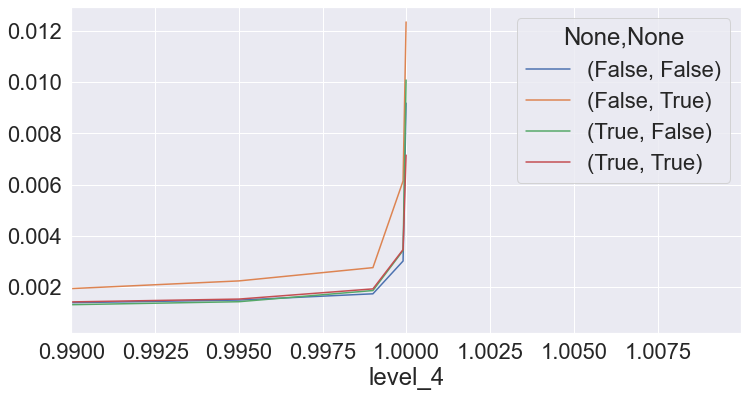

write


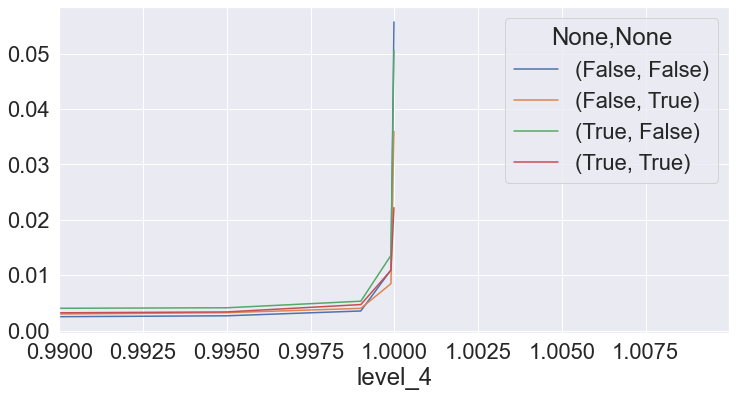

In [16]:
ax = None


for group, group_df in q_df[q_df["n_nodes"] == 4].groupby(['operation',]):
    ax = None
    print(group)
    for group2, group_df2 in group_df[group_df["n_nodes"] == 4].groupby(['order_on_write', 'on_leader']):
        ax = group_df2.plot(x='level_4', y='latency', figsize=(12, 6), label=group2, ax=ax)
        ax.set_xlim(xmin=0.99)
        # sns.boxplot(x='n_nodes', y='latency', hue="order_on_write", data=group_df, showfliers=False)
    plt.show()

In [17]:
agg_df_leader = df.groupby(['experiment', 'operation', 'run_id', 'n_nodes', 'order_on_write', 'on_leader']).latency.mean().reset_index()
agg_df_leader["latency_factor"] = agg_df_leader["latency"] / agg_df_leader["n_nodes"]

NameError: name 'df' is not defined

In [ ]:
fig, axs = plt.subplots(8, 1, figsize=(8, 18))

idx = 0
ax= None

agg_df_leader.groupby(["experiment", "order_on_write", 'operation']).plot(kind="bar", y='latency')



# sns.catplot(kind="bar", x="experiment", y="latency", hue="operation", col="order_on_write", row="n_nodes", data=agg_df_leader)

for group, group_df in agg_df_leader.groupby(["experiment", 'operation']):
    # display(group_df)
    # axs[idx].set_title(group_df.iloc[0, 1])
    axs[idx].set_title(f"order_on_write={group[0]}, operation={group[1]}")
    plt.title(str(group))
    plt.title(f"order_on_write={group[0]}, operation={group[1]}")
    # sns.barplot(x='experiment', y='latency', hue="on_leader", data=group_df)
    # plt.show()
    idx += 1

In [ ]:
# def speedup(sub_df):
#     two_nodes_df = sub_df[sub_df["n_nodes"] == 2]
#     sub_df["speedup"] = sub_df["latency"] / two_nodes_df["latency"].values
#     return sub_df
#
# agg_df_with_speedup = agg_df.groupby(['order_on_write', 'operation']).apply(speedup)

# fig = ax.get_figure()
# fig.savefig('results/figures/order_before_vs_after_write.pdf')